<h1>Math</h1>

This time we have multiple inputs

so $x_i$ becomes a vector of multiple variables

The dimensionality of x is the size of x , denoted by D

our model is :

$\hat y = w^T x + b$

w is also of size D

we can absorb b into w by appending a 1 to x

Rename $b$ to $w_0$ , append $x_0$ which is always 1

so all the following are equivalent:

$\hat y = b + w_1 x_1 + ..... + w_D x_D x $

$\hat y = w_0 + w^1 x_1 + ..... + w_D x_D$

$\hat y = w_0 x_0 + w^1 x_1 + ..... + w_D x_D , x_0 = 1$

$\hat y = w^{'T} x'$

w' is w with $w_0$ appended 

$x'$ is our original NXD matrix $x$ after we add $x_0$ , so $x'$ is equivalent to $x$ after adding a column of ones

$X$ is an NxD matrix , N : number of samples , D is number of features

if we take one sample of x , we get a 1XD feature vector , though in linear algenara the convention is to consider vectors as column vectors and thus a shape DX1

if we want 1 sample prediction , going with linear Algebra's  convention we write :

$\hat y_i = w^T x_i$

$w^T$ is 1xD , x_i is Dx1 so $y_i$ is 1x1

Though in code we have $x_i$ 1xD , so we write it as 

$\hat y_i = x_i w$

if we want to get all N predictions , in either cases we write :

$y_{Nx1} = X_{NxD} \ w_{Dx1}$

Now again , we have the same error , and we want to use calculus to minimise it (if this proof seems hard , feel free to skip to the other proof in the next math section)

$$E = \sum^{N}_{i=1}(y_i - \hat y_i)^2$$

substituting $\hat y_i$ by $w^T x_i$ we get 

$$E = \sum^{N}_{i=1}(y_i - w^T x_i)^2 $$

Where are our variables here ?

we have D variables which are the elements of w , so we differentiate wrt to element j in w , j goes from 1 to D

$$ \frac {\partial E} {\partial j} = \sum ^ {N} _ {i=1} 2(y_i - w^T x_i) (-\frac {\partial (w^T x_i)} {\partial w_j})$$

$$ \frac {\partial E} {\partial j} = \sum ^ {N} _ {i=1} 2(y_i - w^T x_i) (-x_{ij}) $$

i : which sample

j : which feature 

when $w^T x_i$ is expressed in scalar form we get $w_1 x_{i,1} + ..... + w_j x_{i,j} + .... + w_D x_{i,D} $ since we differentiate wrt $w_j$ all terms except for $w_j x_{i,j}$ become 0 , then taking into account  $ x_{i,j}$ is just a scalar we get $ x_{i,j} $   

Next we set to  0 

$$ \sum ^ {N} _ {i=1} 2(y_i - w^T x_i) (-x_{ij}) = 0 $$

Multiply everything out , then bring -ve term to other side so we get

$$ \sum ^ {N} _ {i=1} y_i (-x_{ij}) - \sum ^ {N} _ {i=1}  w^T x_i (-x_{ij})   $$

$$   \sum ^ {N} _ {i=1}  w^T x_i x_{ij} = \sum ^ {N} _ {i=1} y_i x_{ij}   $$

we can take $w^T$ out of summation , since summation is over i and w is independant of i

$$  w^T \sum ^ {N} _ {i=1}  x_i x_{ij} = \sum ^ {N} _ {i=1} y_i x_{ij}   $$

Now remembering that $$ a^T b = \sum ^{N} _{i=1} a_i b_i $$

We yeild :

$w^T (X^T X_j) = y^T X_j $

$X_j$ is column j of X , we need to rememebr now that j goes from 1 to D , meaning that this equation hold true for all values of j from 1 to D , and thus it holds true for all columns of X ,  and thus we can re-write the equation as :

$w^T (X^T X) = y^T X $

since we want $w$ not $w^T$ we can take the transpose of both sides

$[w^T (X^T X)]^T = [y^T X]^T $

and we arrive at 

$(X^T X)w = X^T y$

This comes in the form of a standard linear equation $Ax = b$ in which we the solution is $ x = A^{-1} b $

so we finally arrive a the solution : 

$$ w = (X^T X) ^ {-1} X^T y $$

in numpy we can solve this using :

$np.linalg.solve(X^TX,X^T y)$

<h1>Math</h1>

Now lets try to prove it in another (simpler) way

J : cost/error 

t : targets , Nx1 matrix 

y : predictions , Nx1 matrix

$$ J = \sum ^ {N} _ {i=1} (t_i - y_i)^2 $$

we can vectorise this as :

$$ J = (t - y)^T (t - y)  $$

since the dot product is actually multiplication (which does the squaring) followed by addition (which does the summation) , test it to get yourself convinced 

$ y = Xw $

X : NxD matrix
w : Dx1 vector

now lets expand j , $$ J = (t - y)^T (t - y)  $$

(you may use matrix cookbook for reference , http://matrixcookbook.com/ , also in references)

$t^T t - t^T y - y^T t + y^T y$

substitute $y$ with $Xw$

$t^T t - t^T Xw - (Xw)^T t + (Xw)^T (Xw)$

This also equals :


$t^T t - t^T Xw - w^T X^T t + w^T X^T Xw$

now we take the derivative wrt w , rules are in matrix cookbook (2.4.1) :

$\frac {\partial j} {\partial w} = - X^T t - X^T t + (X^T X + X^T X ) w  $

$\frac {\partial j} {\partial w} = - 2 X^T t  + 2 X^T X  w = 0  $

$  X^T X  w  = X^T t    $

And we elegentally arrive at the slution :

$$ w  =  (X^T X )^{-1} X^T t  $$









<h1>code</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('datasets/data_2d.csv',header = None)
data.head()

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


In [3]:
data = data.to_numpy()
X = data[:,:-1]
ones = np.atleast_2d(np.ones(len(X))).T
X = np.hstack((ones,X))
Y = data[:,-1]

In [4]:
w = np.linalg.solve(X.T@X,X.T@Y)

In [5]:
# lets calculate r2
Yhat = X@w
delta = Y-Yhat
res = delta@delta
delta = Y-Y.mean()
tot = delta@delta
r2 = 1- res/tot
print("r-squared: ",r2)

r-squared:  0.9980040612475777


<h1>Math</h1>

Now we will try polynomial Regression !

Linear Regression means that weight parameters are linear , it says nothing about what x is 

so for y = $ax^2 + bx+ c$ , we have y linear in a,b,c and so we can use linear regression 

<h1>code</h1>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
data = pd.read_csv('datasets/data_poly.csv',header = None)
data.head()

,0,1
0,76.700709,663.797276
1,95.273544,1014.362282
2,73.095723,618.938827
3,46.951635,288.012877
4,33.313748,144.977556


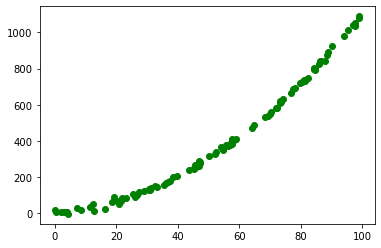

In [8]:
data = data.to_numpy()
X = data[:,0]
Y = data[:,1]
plt.scatter(X,Y,c='g')
plt.show()

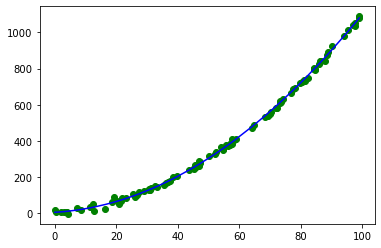

In [9]:
# clearly y is a quadratic function of x
# so we need to solve y = a x^2 + bx + c
X = np.atleast_2d(X).T
ones = np.atleast_2d(np.ones(len(X))).T
X_2 = X**2
X = np.hstack((ones,X,X_2))
w = np.linalg.solve(X.T@X,X.T@Y)
Yhat = X@w
plt.scatter(X[:,1],Y,c='g')
plt.plot(sorted(X[:,1]),sorted(Yhat),c='b')
plt.show()

<h1>Code</h1>

now we will try an example on some real data for polynomial linear regression

Data is about systolic blood pressures for patients

for rach patient $(X_1,X_2,X_3)$

$X_1$ systolic blood pressure

$X_2$ age in years

$X_3$ weight in pounds

we want to predict systolic blood pressure as a function of age and weight

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data = pd.read_excel('datasets/mlr02.xls')
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


In [12]:
# we take X1 and X2 as inputs and try to predict X3
data = data.to_numpy()

In [13]:
X2 = data[:,1]
X3 = data[:,2]
Y = data[:,0]
X23 = data[:,1:]

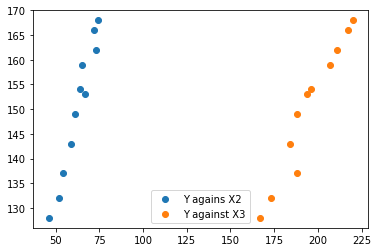

In [14]:
plt.scatter(X2,Y,label = 'Y agains X2')
plt.scatter(X3,Y, label = 'Y against X3')
plt.legend()
plt.show()

In [15]:
def lin_reg(X,Y,plot=True):
    if len(X.shape) == 1:
        X = np.atleast_2d(X).T # form an NxD matrix
        
    ones = np.atleast_2d(np.ones(len(X))).T
    X = np.hstack((ones,X))
    # get weights 
    w = np.linalg.solve(X.T@X,X.T@Y)
    # calculate r^2
    Yhat = X@w
    delta = Y - Yhat
    res = delta@delta
    delta = Y - Y.mean()
    tot = delta@delta
    r2 = 1 - res/tot
    print("r-squared : ",r2)
    if plot:
        plt.scatter(X[:,1],Y,c='g')
        plt.plot(X[:,1],Yhat,c='b')
        plt.show()
    print('----------------------------------------------------------')

r-squared :  0.9578407208147354


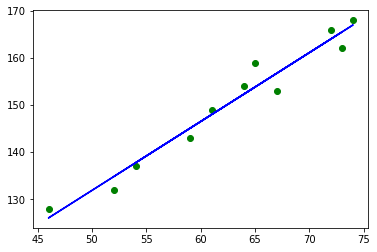

----------------------------------------------------------
r-squared :  0.9419952085293064


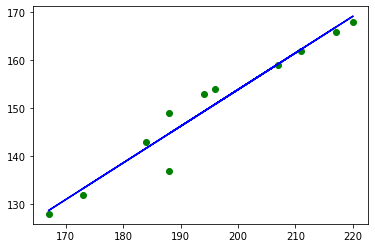

----------------------------------------------------------
r-squared :  0.976847104150209
----------------------------------------------------------


In [16]:
lin_reg(X2,Y)
lin_reg(X3,Y)
lin_reg(X23,Y,plot=False)